## Import Libraries

In [1]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2d

## Load Image

In [2]:
img_raw = np.array(imread('apples.jpg')).astype(np.float32) / 255.
img = np.mean(img_raw, axis=2)
print("img shape:", img.shape)

img shape: (891, 640)


## Add some noise to the image

In [3]:
noise = np.random.normal(scale=0.2, size=img.shape)
img_noise = img + noise

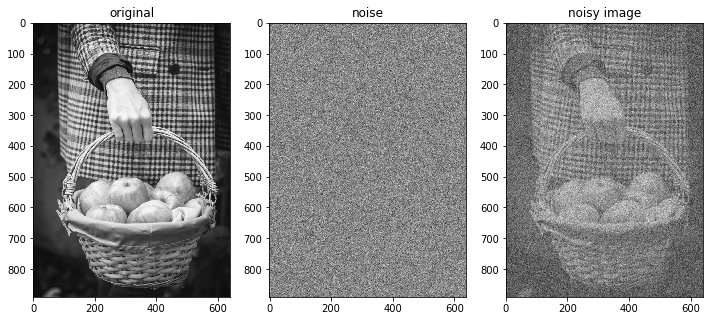

In [4]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(noise, cmap='gray')
plt.title('noise')

plt.subplot(1, 3, 3)
plt.imshow(img_noise, cmap='gray')
plt.title('noisy image')
plt.show()

## Simple (naive) smoothing

In [5]:
# Define a simple smoothing kernel
k = np.ones([15, 15])
k = k / np.sum(k)

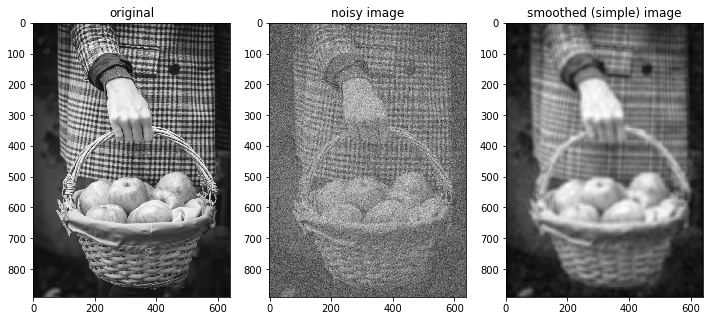

In [6]:
img_smooth_simple = conv2d(img_noise, k, mode='same', boundary='fill', fillvalue=0)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1, 3, 2)
plt.imshow(img_noise, cmap='gray')
plt.title('noisy image')

plt.subplot(1, 3, 3)
plt.imshow(img_smooth_simple, cmap='gray')
plt.title('smoothed (simple) image')
plt.show()

## Smoothing Normalization
Key point is that we are doing per-pixel normalization

In [7]:
# Convolve a all-one matrix with the kernel 
# to get the normalizing factor for each output pixel 
ones = np.ones_like(img)
norm = conv2d(ones, k, mode='same', boundary='fill', fillvalue=0)

# Normalize
img_smooth_normalized = img_smooth_simple / norm

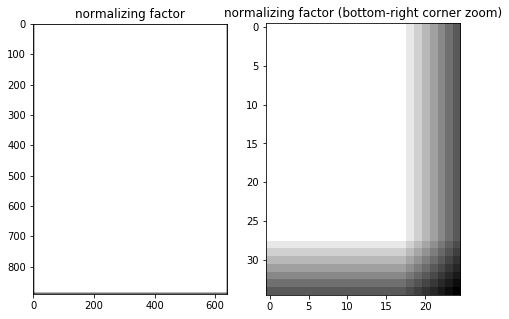

In [8]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(norm, cmap='gray')
plt.title('normalizing factor')

plt.subplot(1, 4, 2)
plt.imshow(norm[-35:, -25:], cmap='gray')
plt.title('normalizing factor (bottom-right corner zoom)')
plt.show()

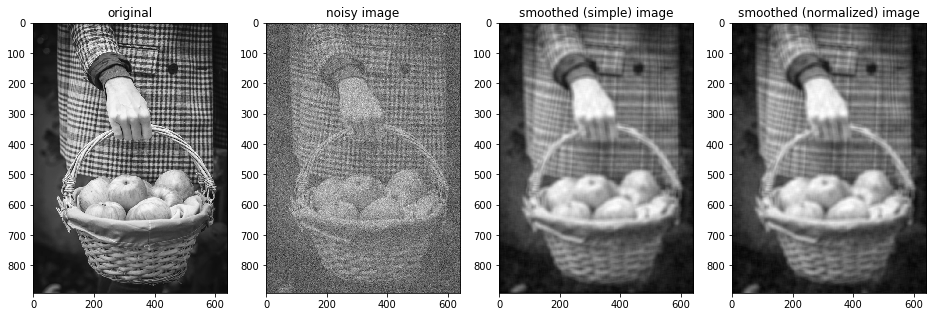

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(img_noise, cmap='gray')
plt.title('noisy image')

plt.subplot(1, 4, 3)
plt.imshow(img_smooth_simple, cmap='gray')
plt.title('smoothed (simple) image')

plt.subplot(1, 4, 4)
plt.imshow(img_smooth_normalized, cmap='gray')
plt.title('smoothed (normalized) image')
plt.show()

Zoom into the bottom-right corner


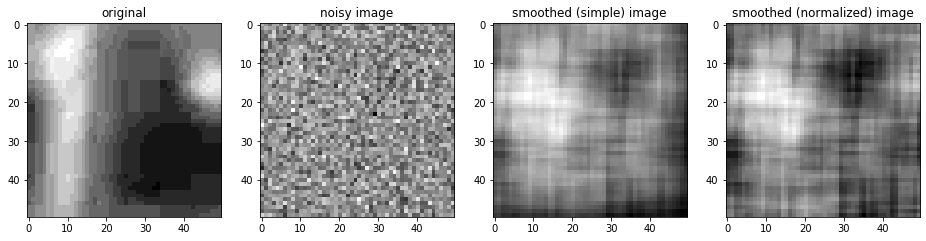

In [10]:
plt.figure(figsize=(16, 6))
print('Zoom into the bottom-right corner')

plt.subplot(1, 4, 1)
plt.imshow(img[-50:, -50:], cmap='gray')
plt.title('original')

plt.subplot(1, 4, 2)
plt.imshow(img_noise[-50:, -50:], cmap='gray')
plt.title('noisy image')

plt.subplot(1, 4, 3)
plt.imshow(img_smooth_simple[-50:, -50:], cmap='gray')
plt.title('smoothed (simple) image')

plt.subplot(1, 4, 4)
plt.imshow(img_smooth_normalized[-50:, -50:], cmap='gray')
plt.title('smoothed (normalized) image')
plt.show()


Notice how the edges on the normalized smoothing is not as dark as the simple one.